### Documentación útil sobre KOI
Documentación para leer los datos de KOI (*Kepler Object of Interest*).

[GoTo_Metadata](#metadata)  
[GoTo_LightCurve](#lightcurve)

In [1]:
### imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<a id="metadata"></a>
# LOAD METADATA

### set folder

In [2]:
folder = "../KOI_Data/"

#si estas dentro de tu carpeta "obj" el folder debe ser:
#folder = "../../KOI_Data/"

### read mask of sets

In [3]:
df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values ##validacion
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values  ##test
df_sets.head()

,KOI Name,Set
0,K00889.01,Test
1,K01009.01,Train
2,K07621.01,Train
3,K06252.01,Train
4,K00958.01,Unlabeled


In [25]:
arreglo = np.zeros(df_sets.shape[0], dtype='object')

labeled = np.arange(len(arreglo))[~mask_unlabeled]
mask_test = np.random.rand(labeled.shape[0]) < 0.3

labeled_train = labeled[~mask_test]
labeled_test =  labeled[mask_test]

arreglo[labeled_train] = "Train"
arreglo[labeled_test] = "Test"
arreglo[mask_unlabeled] = "Unlabeled"

arreglo

array(['Train', 'Train', 'Test', ..., 'Train', 'Unlabeled', 'Train'],
      dtype=object)

In [26]:
df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
df_sets["Set"] = arreglo

df_sets.to_csv(folder+"/koi_sets.csv", index=False)

### read metadata and apply mask

In [3]:
df_meta = pd.read_csv(folder+"/koi_metadata.csv")
df_meta_train = df_meta[mask_train]
df_meta_test = df_meta[mask_test]
df_meta_unb = df_meta[mask_unlabeled]

df_meta_train.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.53594,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.24860,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.77449,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
6,K04162.01,FALSE POSITIVE,NaN,0.539366,131.97457,2454964.975,0.988,5.43400,145.0,0.016,...,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1,1239
9,K00998.01,FALSE POSITIVE,NaN,161.788327,214.03900,2455047.039,0.267,5.31000,87750.0,0.273,...,6018.0,4.327,0.18,1.212,1.142,341.666,806.993,704.5,1,9


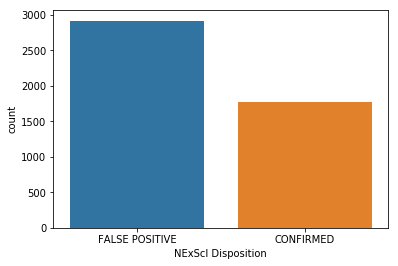

In [20]:
sns.countplot(data=df_meta_train, x="NExScI Disposition")
plt.show()

### Impute median on nulls!


In [4]:
def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

df_meta_train = impute_on_pandas(df_meta_train)
df_meta_test = impute_on_pandas(df_meta_test)
df_meta_train.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.53594,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.24860,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.77449,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
6,K04162.01,FALSE POSITIVE,NaN,0.539366,131.97457,2454964.975,0.988,5.43400,145.0,0.016,...,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1,1239
9,K00998.01,FALSE POSITIVE,NaN,161.788327,214.03900,2455047.039,0.267,5.31000,87750.0,0.273,...,6018.0,4.327,0.18,1.212,1.142,341.666,806.993,704.5,1,9


### Set ground truth

In [6]:
y_train = ((df_meta_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_meta_test["NExScI Disposition"]=="CONFIRMED")*1).values
y_train

array([0, 0, 0, ..., 1, 1, 0])

### Evaluate models

In [9]:
import os, sys
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)

from evaluation import calculate_metrics
calculate_metrics(y_train,np.ones((y_train.shape[0],1)))

                F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.274583  0.274583  0.000000     0.207868       0.000000   
Confirmed       0.274583  0.274583  0.549165     0.207868       0.378517   

                Recall raw  
False Positive         0.0  
Confirmed              1.0  


/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'F1 macro': 0.274582560296846,
 'F1 micro': 0.274582560296846,
 'F1 raw': array([0.        , 0.54916512]),
 'F1 weighted': 0.2078681274881494,
 'Precision raw': array([0.        , 0.37851662]),
 'Recall raw': array([0., 1.])}

<a id="lightcurve"></a>
# LOAD KEPLER LIGHT CURVES 

### set folder

In [2]:
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"

In [3]:
time_kepler = np.load(folder_lc+"npy/KOI_LC_time.npy") #no contiene nans
lc_kepler = np.load(folder_lc+"npy/KOI_LC_init.npy" ) #contiene nans!
lc_kepler.shape

(8054, 71427)

### read mask of sets

In [11]:
df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values
df_sets.head()

,KOI Name,Set
0,K00889.01,Test
1,K01009.01,Train
2,K07621.01,Train
3,K06252.01,Train
4,K00958.01,Unlabeled


### apply mask of sets

In [12]:
lc_kepler_train = lc_kepler[mask_train]
lc_kepler_test = lc_kepler[mask_test]
lc_kepler_unl = lc_kepler[mask_unlabeled]
lc_kepler_unl

array([[ 7.7190e-04,  4.8390e-04,  5.3410e-04, ...,  1.6400e-05,
        -1.6060e-04,  1.5900e-04],
       [-5.9321e-03, -5.6883e-03, -5.3598e-03, ...,  2.0195e-03,
         2.0839e-03,  2.4260e-03],
       [-4.7540e-04, -2.8200e-04, -7.9500e-05, ..., -1.8650e-04,
         6.1000e-06,  3.3810e-04],
       ...,
       [-9.8770e-04, -3.0760e-04, -2.9730e-04, ...,  2.8480e-04,
        -2.1460e-04,  1.2520e-04],
       [-1.3870e-04,  1.0350e-04,  2.8300e-05, ...,  4.3000e-06,
         8.4600e-05,  1.2980e-04],
       [-3.1820e-04,  7.7890e-04, -4.0230e-04, ...,  7.8900e-05,
         5.2180e-04, -9.2220e-04]])